## Problem Statement: 

**To address the business problem and provide actionable insights to Walmart and conduct a thorough analysis of the provided dataset.**

## Dataset Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Load the dataset
df = pd.read_csv('/kaggle/input/walmart-data/walmart_data.csv')

# Display the first few rows of the dataset
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Non-Graphical Analysis

In [3]:
# Checking the structure and summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [4]:
cat_cols = df.select_dtypes(include='object').columns.to_list()
cat_cols.extend(['Marital_Status', 'Product_Category'])
df[cat_cols] = df[cat_cols].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(7), int64(3)
memory usage: 16.9 MB


In [5]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [6]:
df[['Occupation', 'Purchase']].describe()

,Occupation,Purchase
count,550068.000000,550068.000000
mean,8.076707,9263.968713
std,6.522660,5023.065394
min,0.000000,12.000000
25%,2.000000,5823.000000
50%,7.000000,8047.000000
75%,14.000000,12054.000000
max,20.000000,23961.000000


In [7]:
df.describe(include='category')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068
unique,3631,2,7,3,5,2,20
top,P00265242,M,26-35,B,1,0,5
freq,1880,414259,219587,231173,193821,324731,150933


In [8]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

## Visual Analysis

### Univariate Analysis

In [9]:
def plot_continuous_variable(data, variable, type='hist'):
    # Histogram
    if type=='hist':
        sns.histplot(data[variable].dropna(), color='blue', kde=True)
        plt.title(f'Histogram of {variable}')
    
    
def plot_categorical_variable(data, category, rotation=0):
    # Boxplot
    if len(data[category].value_counts()) > 5:
        top_5_categories = data[category].value_counts().nlargest(5).index
    # Filter the data to include only the top 5 categories
        filter_data = data[data[category].isin(top_5_categories)]
        sns.countplot(data=filter_data, x=category, palette='Set2', order=filter_data[category].value_counts().index)
        plt.xticks(rotation=rotation)
    else:
        sns.countplot(data=data, x=category, palette='Set2')
    plt.title(f'Barplot of {category}')
    plt.xlabel(category)
    


In [10]:
num_cols = ['Occupation', 'Purchase']
cat_cols = cat_cols[1:]

#### Numerical data

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


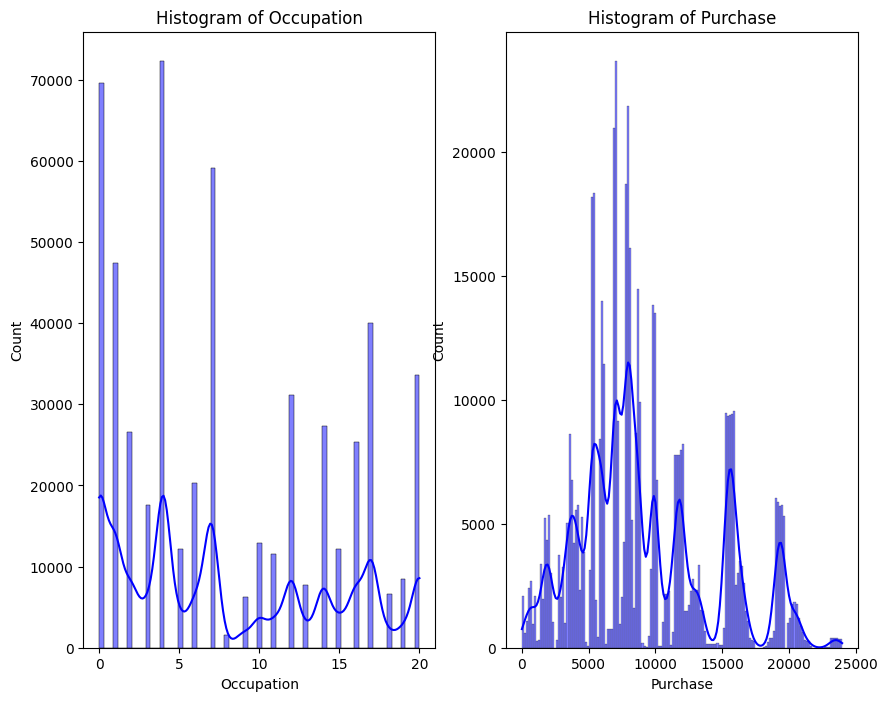

In [11]:
plt.figure(figsize=(10, 8))
i = 1
for col in num_cols:
    plt.subplot(1, 2, i)
    plot_continuous_variable(df, col, 'hist')
    i += 1
plt.show()

**Most of the numerical data is not a normally distributed data.**

#### Categorical Data

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

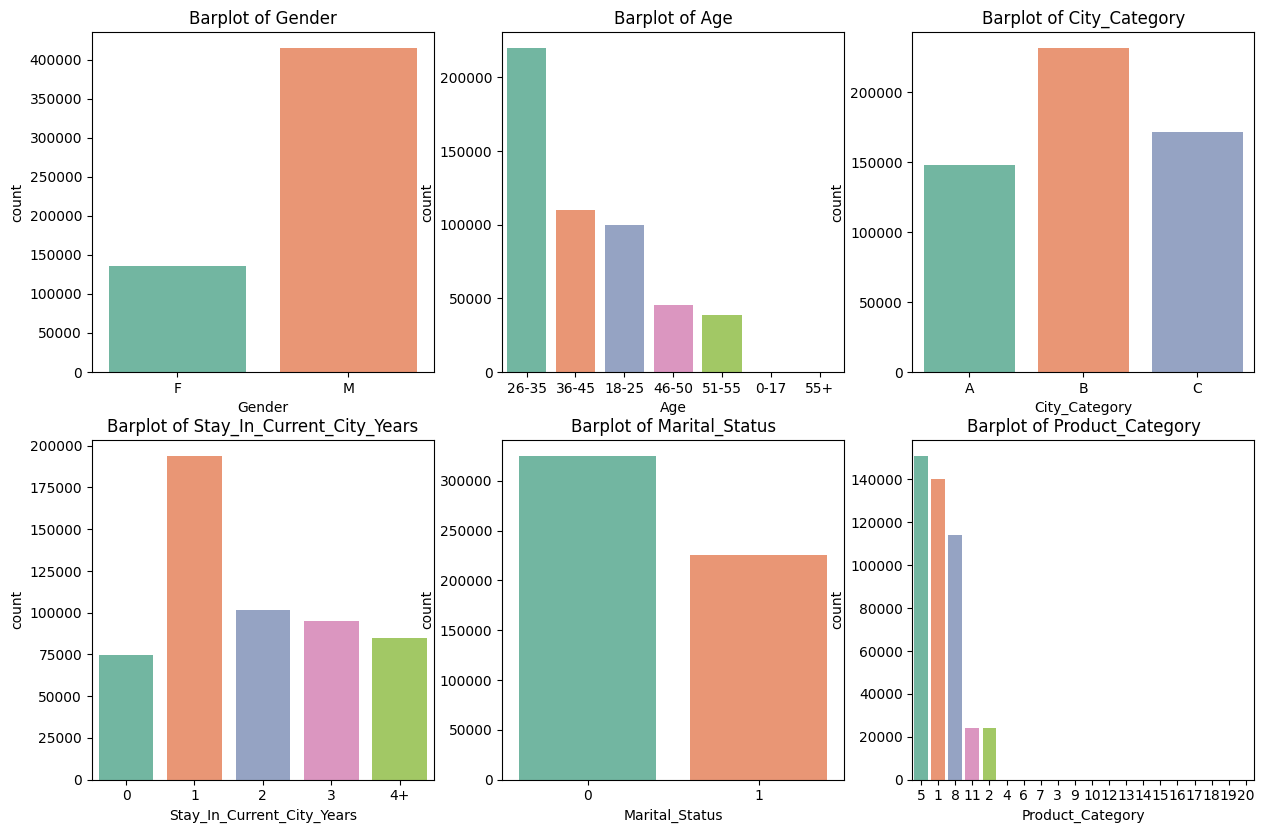

In [12]:
plt.figure(figsize=(15, 15))
i = 1
for col in cat_cols:
    plt.subplot(3, 3, i)
    plot_categorical_variable(df, col)
    i += 1

**Most of the Categorical Data is orthogonal with largest groups being:**
- Gender: Male
- Age: 26-35
- City_Category: B
- Stay_In_Current_City_Years: 1
- Marital_Status: Unmarried
- Product_Category: 5

### Bi-variate Analysis

In [13]:
def plot_bivariate_plot_NC(data, category, variable):
    sns.violinplot(x=df[category].dropna(), y=df[variable].dropna())
    plt.title(f'violinplot of {variable} by {category}',fontdict={'fontsize':10})
    plt.xlabel(category)
    plt.ylabel(variable)

    
def plot_bivariate_plot_CC(data, category_1, category_2, rotation=0):
    sns.countplot(data=data, x=category_1, hue=category_2, palette='Set2')
    plt.xticks(rotation=rotation)
    plt.title(f'Grouped Barplot of {category_1} and {category_2}')
    plt.legend(bbox_to_anchor=(0.95, 1), loc='upper left')

# Define a function to create the required bivariate plots for continuous-continuous variables
def plot_bivariate_plot_NN(data, variable_1, variable_2):
    # Scatterplot
    sns.scatterplot(x=variable_1, y=variable_2, data=data)
    plt.title(f'scatterPlot of {variable_1} by {variable_2}')
    plt.xlabel(variable_1)
    plt.ylabel(variable_2)


#### Categorical - Continuous Data

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

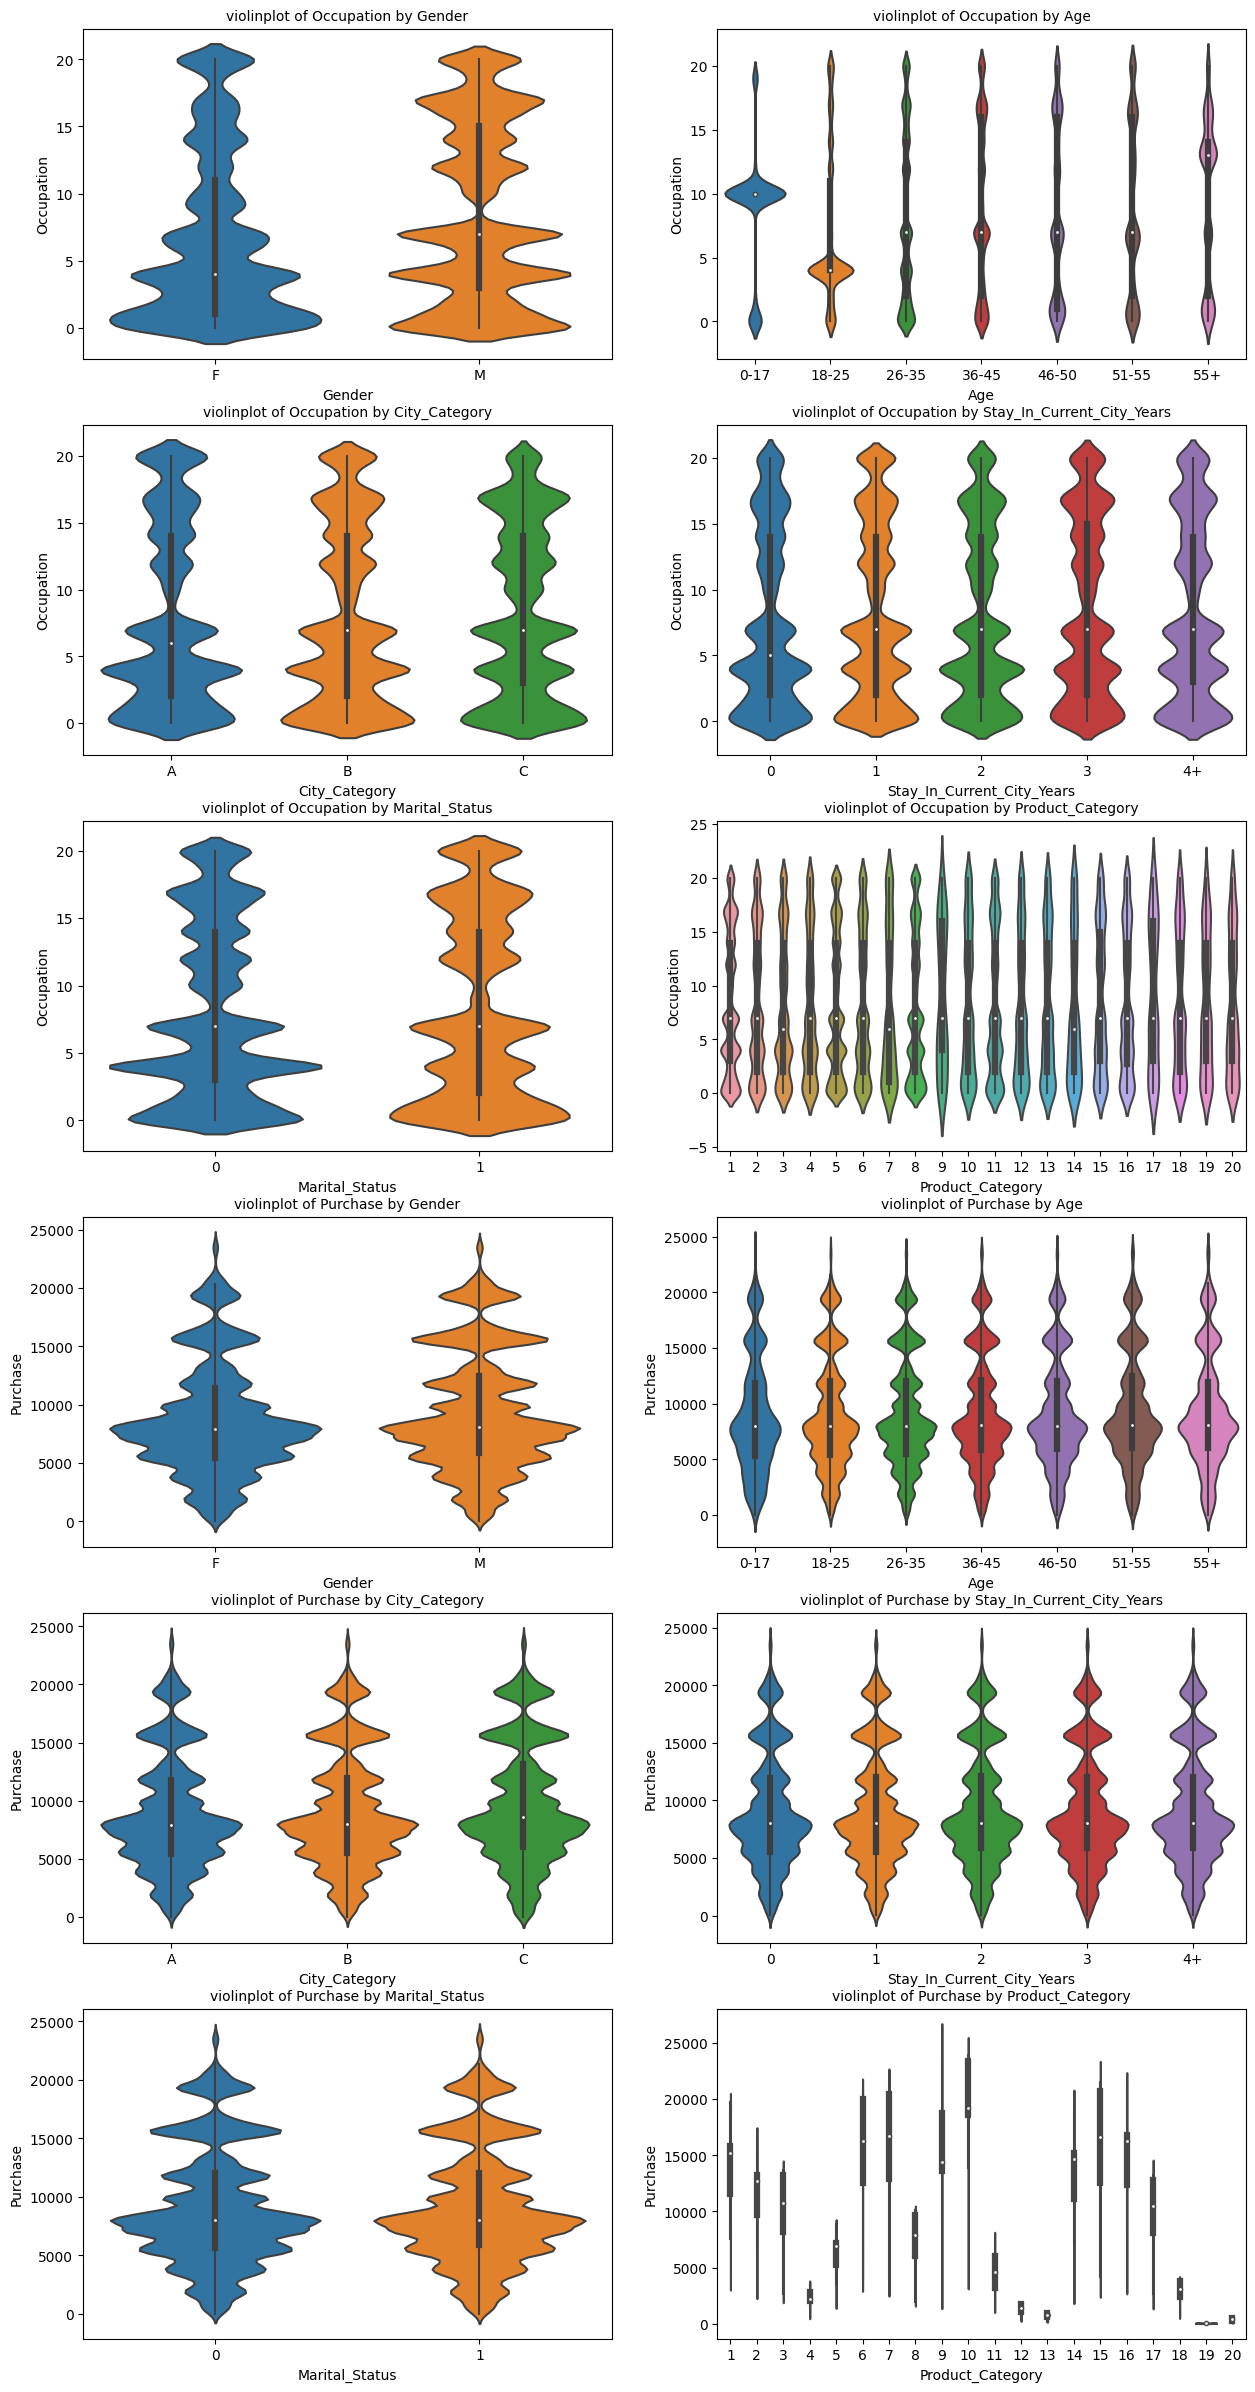

In [14]:
plt.figure(figsize=(15,30))
i = 1
for col_n in num_cols:
    for col_c in cat_cols:
        plt.subplot(6, 2, i)
        plot_bivariate_plot_NC(df, col_c, col_n)
        i += 1
plt.show()

#### Continuous - Continuous Data

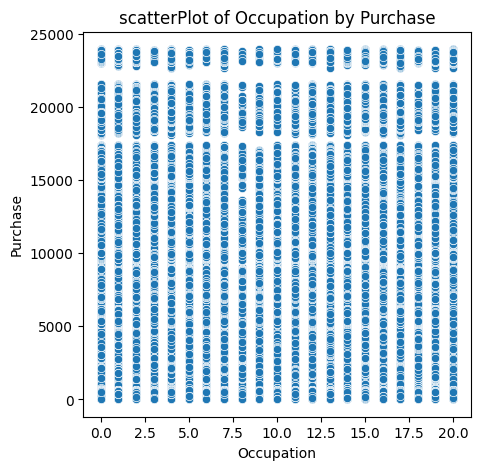

In [15]:
plt.figure(figsize=(5, 5))
plot_bivariate_plot_NN(df, num_cols[0], num_cols[1])
plt.show()

#### Categorical - Categorical Data

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


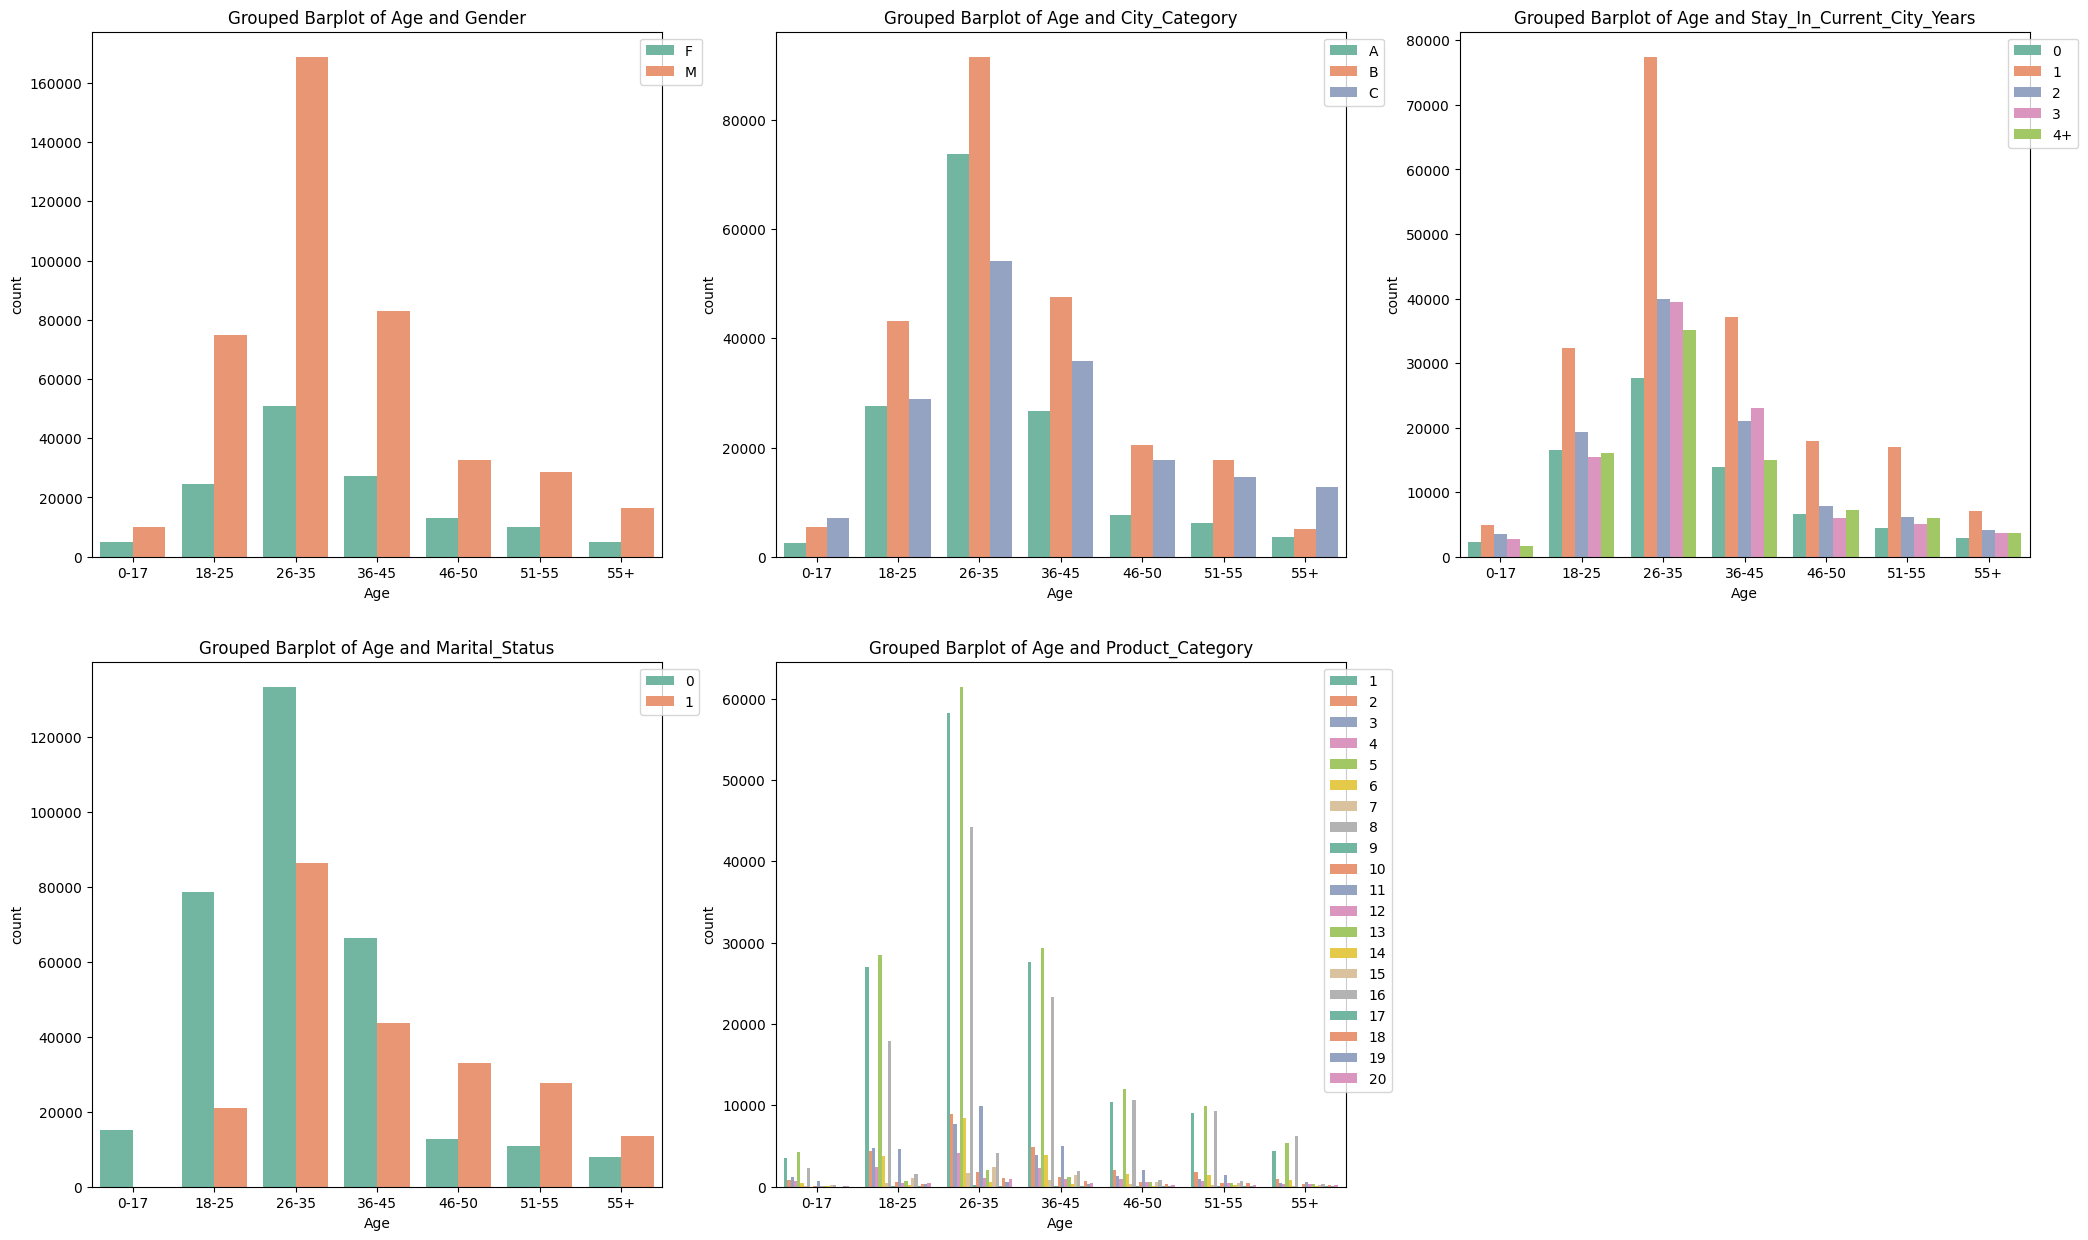

In [16]:
plt.figure(figsize=(25, 15))
i = 1
for col in cat_cols:
    if col!='Age':
        plt.subplot(2, 3, i)
        plot_bivariate_plot_CC(df, 'Age', col)
        i += 1
plt.show()

### Correlation Analysis

#### Correlation Heatmap 

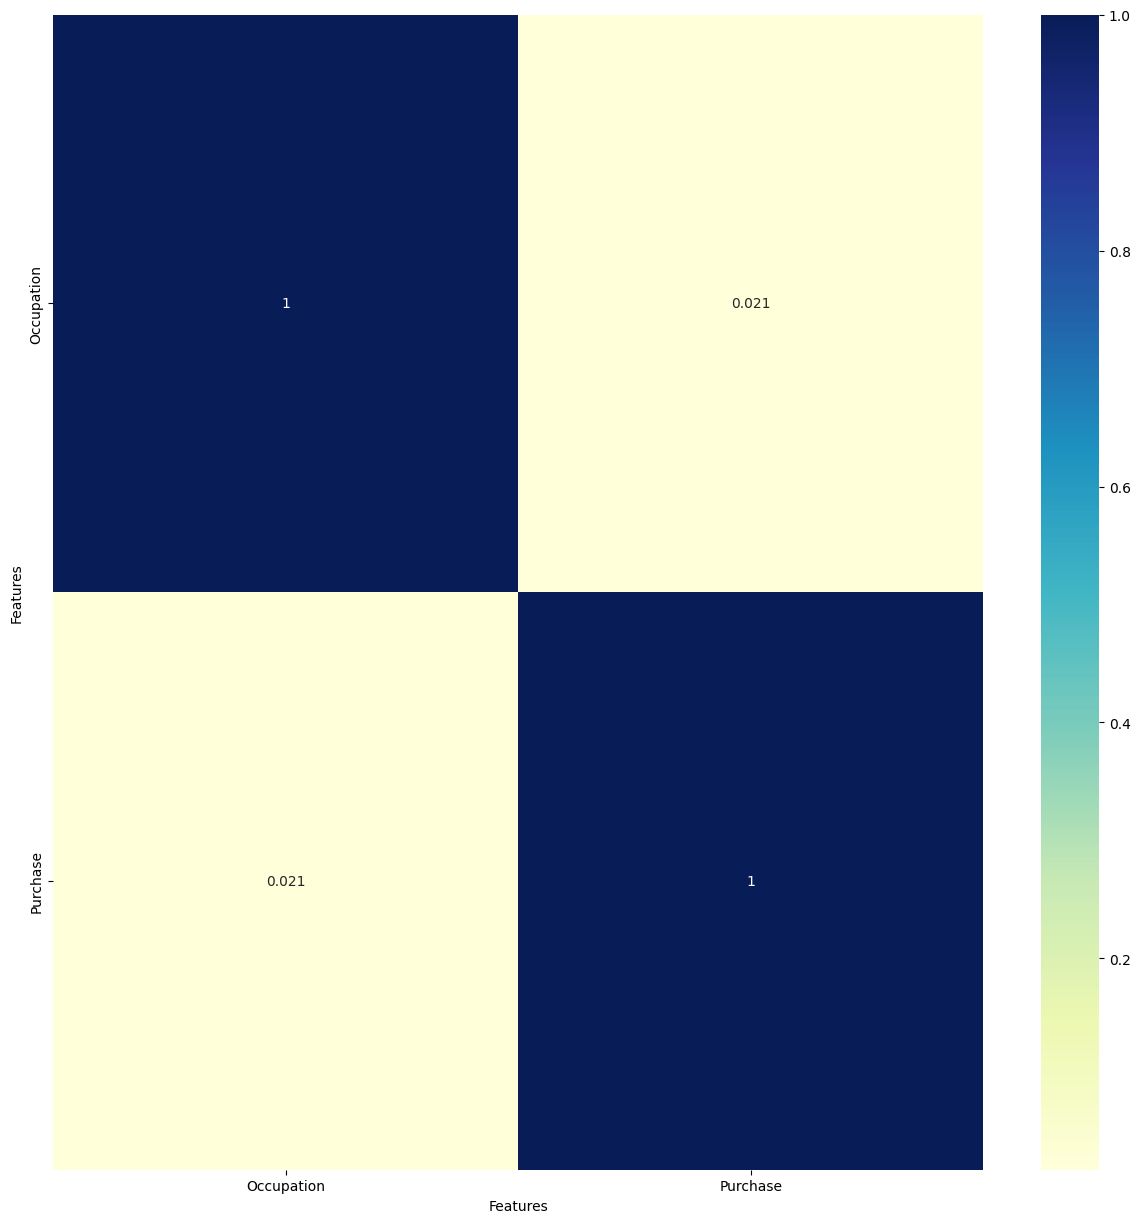

In [17]:

correlation_matrix = df[num_cols].corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

**There is little to no correlation between the two numerical columns.**

#### Pairplot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na

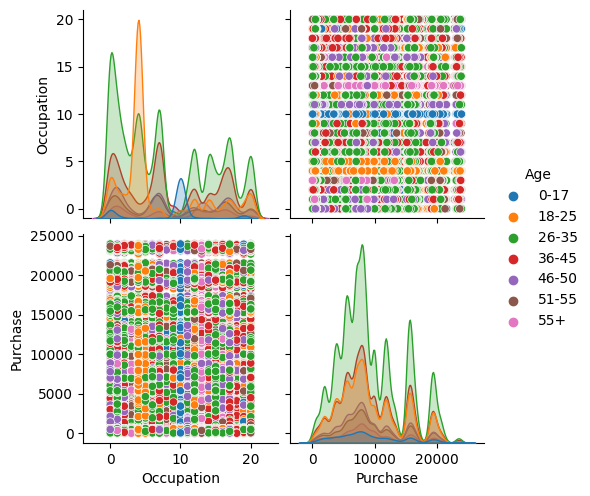

In [18]:
sns.pairplot(df.drop(['User_ID', 'Product_ID'],axis=1), hue='Age')
plt.show()


## Outlier Detection

In [19]:
# Checking for outliers using IQR method
num_data = df[num_cols]
Q1 = num_data.quantile(0.25)
Q3 = num_data.quantile(0.75)
IQR = Q3 - Q1
outliers = num_data[(num_data < (Q1 - 1.5 * IQR)) | (num_data > (Q3 + 1.5 * IQR))].dropna(how='all')
outliers

,Occupation,Purchase
343,NaN,23603.0
375,NaN,23792.0
652,NaN,23233.0
736,NaN,23595.0
1041,NaN,23341.0
...,...,...
544488,NaN,23753.0
544704,NaN,23724.0
544743,NaN,23529.0
545663,NaN,23663.0


## Business Insight Analyis

In [20]:
# Calculate Total and Average Spending per Gender
gender_spending = df.groupby('Gender')['Purchase'].agg(['sum', 'mean', 'count']).reset_index()
print(gender_spending)


  Gender         sum         mean   count
0      F  1186232642  8734.565765  135809
1      M  3909580100  9437.526040  414259


/tmp/ipykernel_18/326892395.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_spending = df.groupby('Gender')['Purchase'].agg(['sum', 'mean', 'count']).reset_index()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


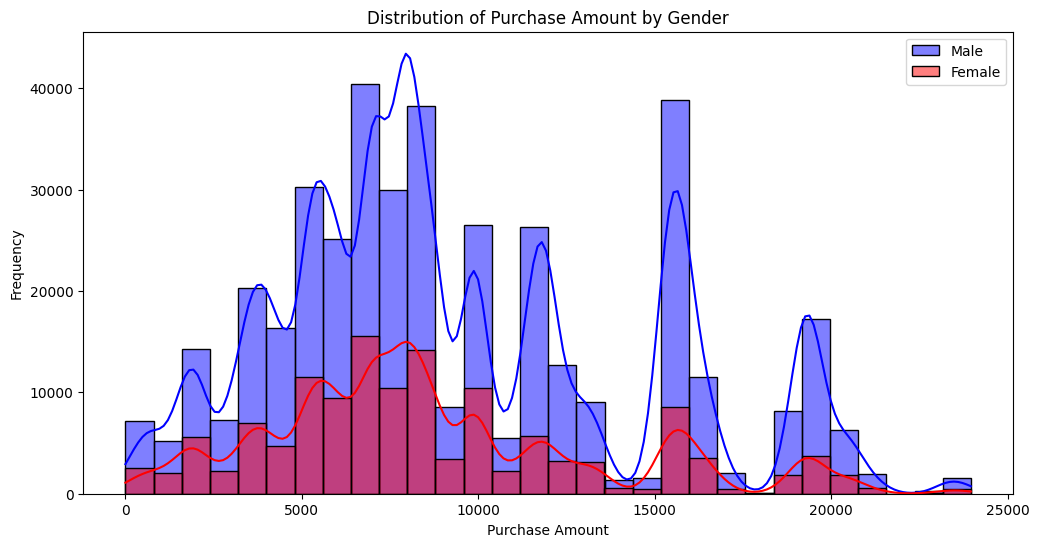

In [21]:

# Plot Spending Distribution by Gender
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Gender'] == 'M']['Purchase'], color='blue', label='Male', kde=True, bins=30)
sns.histplot(df[df['Gender'] == 'F']['Purchase'], color='red', label='Female', kde=True, bins=30)
plt.legend()
plt.title('Distribution of Purchase Amount by Gender')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()



In [22]:
# Confidence Interval Calculation for Male and Female
import scipy.stats as stats

def calculate_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = stats.sem(data)
    h = std_err * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean-h, mean+h


In [23]:

male_purchase = df[df['Gender'] == 'M']['Purchase']
female_purchase = df[df['Gender'] == 'F']['Purchase']

male_ci = calculate_confidence_interval(male_purchase)
female_ci = calculate_confidence_interval(female_purchase)

print(f'Male Purchase Confidence Interval (95%): {male_ci}')
print(f'Female Purchase Confidence Interval (95%): {female_ci}')



Male Purchase Confidence Interval (95%): (9437.526040472265, 9422.019402055814, 9453.032678888716)
Female Purchase Confidence Interval (95%): (8734.565765155476, 8709.21132117373, 8759.92020913722)


/tmp/ipykernel_18/373699443.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=['Male', 'Female'], y=[male_ci[0], female_ci[0]], capsize=0.2, ci='sd')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


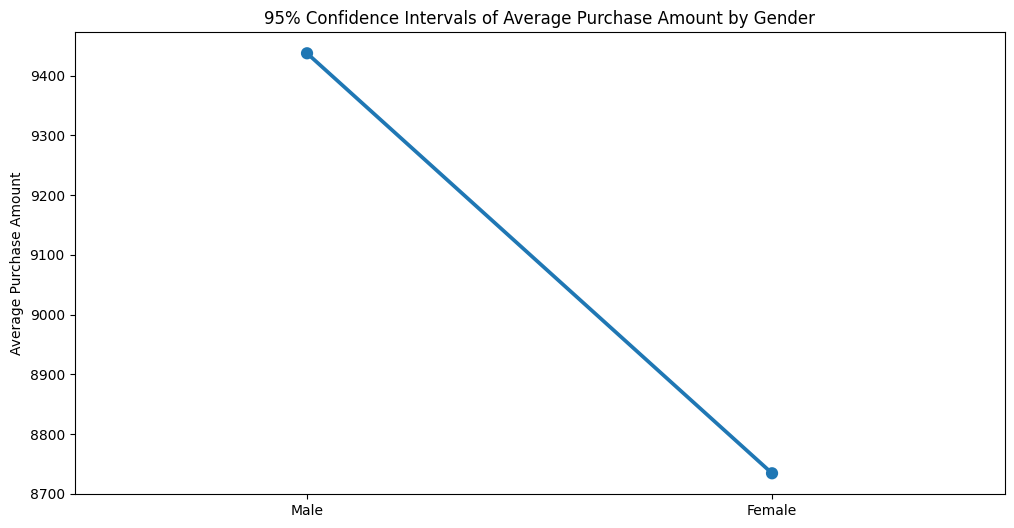

/tmp/ipykernel_18/373699443.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  marital_spending = df.groupby('Marital_Status')['Purchase'].agg(['sum', 'mean', 'count']).reset_index()


  Marital_Status         sum         mean   count
0              0  3008927447  9265.907619  324731
1              1  2086885295  9261.174574  225337


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


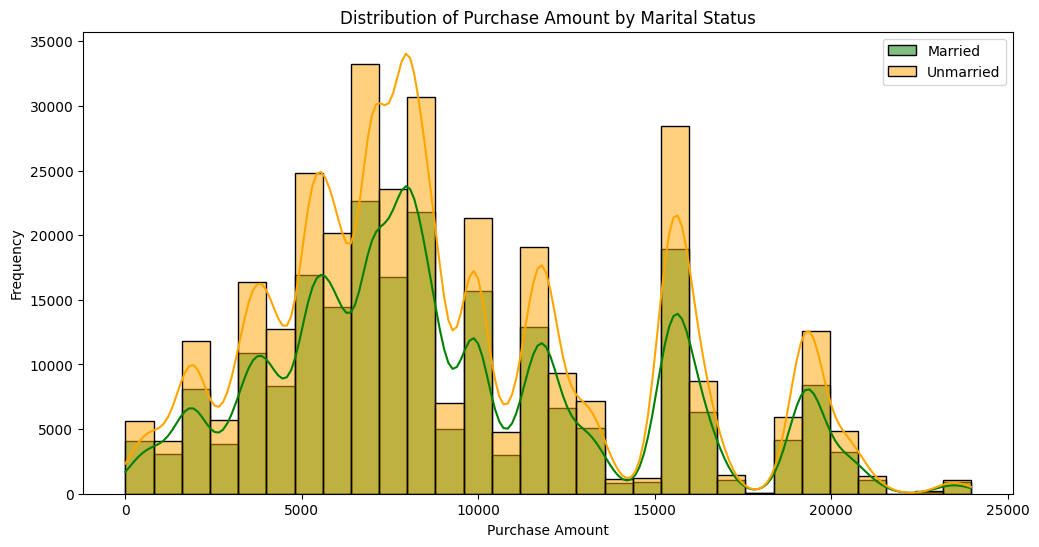

In [24]:
# Visualization of Confidence Intervals
plt.figure(figsize=(12, 6))
sns.pointplot(x=['Male', 'Female'], y=[male_ci[0], female_ci[0]], capsize=0.2, ci='sd')
plt.title('95% Confidence Intervals of Average Purchase Amount by Gender')
plt.ylabel('Average Purchase Amount')
plt.show()

# Repeat Analysis for Marital Status
marital_spending = df.groupby('Marital_Status')['Purchase'].agg(['sum', 'mean', 'count']).reset_index()
print(marital_spending)

# Plot Spending Distribution by Marital Status
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Marital_Status'] == 1]['Purchase'], color='green', label='Married', kde=True, bins=30)
sns.histplot(df[df['Marital_Status'] == 0]['Purchase'], color='orange', label='Unmarried', kde=True, bins=30)
plt.legend()
plt.title('Distribution of Purchase Amount by Marital Status')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


/tmp/ipykernel_18/4276004380.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spending = df.groupby('Age')['Purchase'].agg(['sum', 'mean', 'count']).reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


     Age         sum         mean   count
0   0-17   134913183  8933.464640   15102
1  18-25   913848675  9169.663606   99660
2  26-35  2031770578  9252.690633  219587
3  36-45  1026569884  9331.350695  110013
4  46-50   420843403  9208.625697   45701
5  51-55   367099644  9534.808031   38501
6    55+   200767375  9336.280459   21504


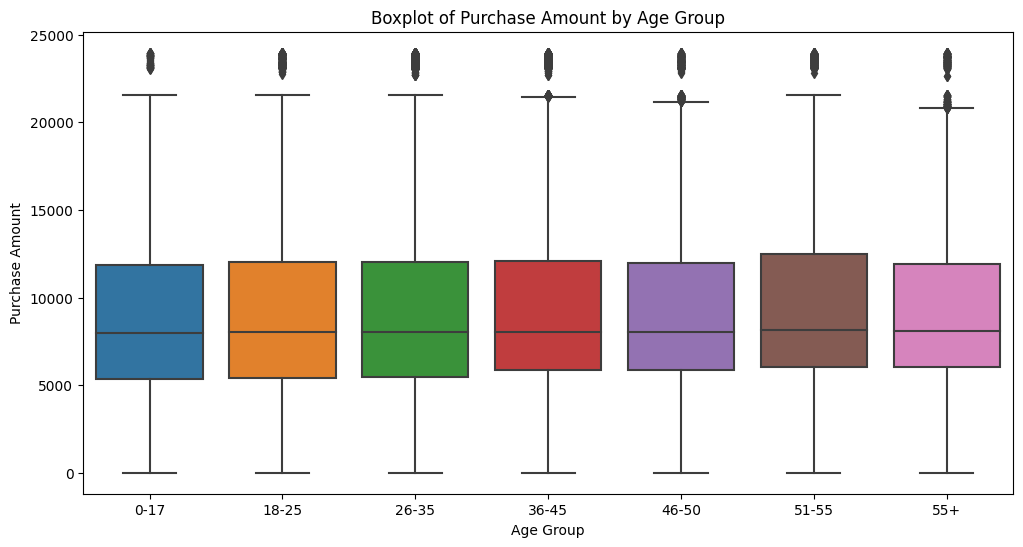

In [25]:

# Repeat Analysis for Age Groups
age_spending = df.groupby('Age')['Purchase'].agg(['sum', 'mean', 'count']).reset_index()
print(age_spending)

# Plot Spending Distribution by Age Group
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Purchase', data=df)
plt.title('Boxplot of Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.show()


## Insights

#### Gender Spending:
* **Men:** Average spend per transaction is $9437.53.

* **Women:** Average spend per transaction is $8734.57.

* **Confidence Intervals:**

* **Men:** (9422.02, 9453.03)

* **Women:** (8709.21, 8759.92)

**Conclusion:** Men spend significantly more per transaction than women, with non-overlapping confidence intervals indicating statistical significance.

#### Marital Status Spending:
* **Unmarried:** Average spend per transaction is $9265.91.

* **Married:** Average spend per transaction is $9261.17.

**Conclusion:** There is no significant difference in spending between unmarried and married customers as their confidence intervals overlap.

#### Age Group Spending:
* **0-17:** Average spend per transaction is $8933.46.

* **18-25:** Average spend per transaction is $9169.66.

* **26-35:** Average spend per transaction is $9252.69.

* **36-45:** Average spend per transaction is $9331.35.

* **46-50:** Average spend per transaction is $9208.63.

* **51-55:** Average spend per transaction is $9534.81.

* **55+:** Average spend per transaction is $9336.28.

**Conclusion:** Significant variation in spending across age groups, with 51-55 having the highest average spending.


## Recommendations

#### Targeted Marketing Strategies
#### Gender-Based Marketing:
- **Men:**
Focus on promoting premium products and high-value items (e.g., electronics, high-end gadgets, sports equipment).
Create exclusive promotions and bulk purchase deals.
- **Women:**
Develop marketing strategies to increase transaction size (e.g., fashion, beauty products, bundled offers).
Offer personalized promotions based on past purchase behaviors.

#### Product Assortment Optimization
#### Stock and Display:
- **Men:** Ensure high-demand, high-value products are well-stocked and prominently displayed.
- **Women:** Highlight product bundles and promotions to encourage higher spending per transaction.

#### Loyalty Programs and Personalized Offers
#### Loyalty Programs:
- Develop gender-specific loyalty programs that reward higher spending.
- **Men:** Points for high-value items, exclusive access to premium products.
- **Women:** Rewards for frequent purchases, special deals on bundled products.

#### Age Group-Specific Strategies
#### Tailored Promotions:
- **High-Spending Age Groups (51-55):**
Focus on high-value items and premium products.
- **Low-Spending Age Groups (0-17, 18-25):**
Promote trend-based, lower-priced items to appeal to younger customers.
Create engagement through social media and influencer marketing targeting these age groups.

#### Customer Experience Enhancements:
- **In-Store Experience:**
Create dedicated sections for premium products targeting male customers.
Fashion and beauty sections with attractive offers for female customers.
- **Online Experience:**
Provide personalized recommendations based on past purchase behavior.
Implement gender-specific promotional banners and email marketing campaigns.

#### Actionable Items for Walmart
- Implement targeted marketing campaigns for men and women based on spending patterns.
- Optimize product assortment to ensure high-demand products are available and prominently displayed.
- Develop and promote loyalty programs that reward higher spending and frequent purchases.
- Create tailored promotions for different age groups to maximize engagement and spending.
- Enhance in-store and online experiences to cater to the preferences of different customer segments.
- Conduct further segmentation analysis to uncover additional insights for improved marketing and product strategies.
